### ME5: Simple Linear Regression on COVID-19 Datasets


#### Learning the data using visualization and simple linear regression

1. First, run the examples and understand the ML process and be familir with Python package functions for simple linear regression. 

2. Apply exploratory data analysis and simple regression on COVID-19 dataset(s). 

#### Write your name and your collaborators if any.

- Han Duong

- Veronica Carpenter

### Part 0: Recap of regression model evaluation

#### Regression modeling

Cross validation:
- https://scikit-learn.org/stable/modules/cross_validation.html

Model evaluation:
- https://scikit-learn.org/stable/modules/model_evaluation.html

Linear regression:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Logistic regression (In general, logistic regressions are used for classification):
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### Model evaluation metrics for regression models

First, Let's review model evaluation metrics for regression models. 

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

#### The R2 ("r-squared") Regression Score

- Measures how well a prediction model for regression fits the given data.

- The score is between 0 and 1:

     - A value of 0 corresponds to a constant model that predicts the mean value of all training target values.

     - A value of 1 corresponds to perfect prediction

- Also known as "coefficient of determination"

## Part 0 - Simple Linear Regression Examples

Two linear regression models:

(1) A real dataset: each data tuple has one attribute in X and its corresponding y value. 

(2) A synthetic dataset: each data tuple has two attributes in X and its corresponding y value. 

###  (1) Simple Linear Regression Example - one attribute in X

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \theta_0x_0 + \theta_1x_1$

- $y$ is the response
- $x_0 = 1$
- $x_1$ is the attribute
- $\theta_0$ is the coeffficient for $x_0$ (intercept)
- $\theta_1$ is the coefficient for $x_1$

The $\theta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

Follow the code and observe the results

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

### Data Preparation

The code expects the data files to be located in the current directory. Fetch the files in datasets/lifesat.

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)

for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

#### Load the data into a DataFrame

In [6]:
# Code example of load the data and prepared the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

#### Select the data and visualize it

In [7]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

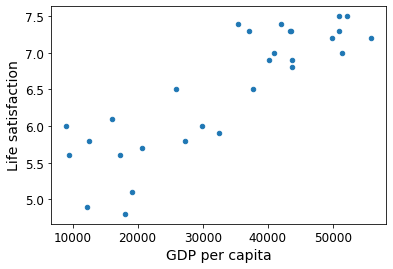

In [8]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [9]:
print(X)

[[ 9054.914]
 [ 9437.372]
 [12239.894]
 [12495.334]
 [15991.736]
 [17288.083]
 [18064.288]
 [19121.592]
 [20732.482]
 [25864.721]
 [27195.197]
 [29866.581]
 [32485.545]
 [35343.336]
 [37044.891]
 [37675.006]
 [40106.632]
 [40996.511]
 [41973.988]
 [43331.961]
 [43603.115]
 [43724.031]
 [43770.688]
 [49866.266]
 [50854.583]
 [50961.865]
 [51350.744]
 [52114.165]
 [55805.204]]


In [10]:
X.shape

(29, 1)

In [11]:
y.shape

(29, 1)

### Build a simple regression model


#### Create a simple linear regression 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [12]:
# import model
from sklearn.linear_model import LinearRegression

# Create a simple linear regression model
model = LinearRegression()

# Train the model (we use all data for training --> Later we will divide the data into training data and testing data)
model.fit(X, y)

LinearRegression()

In [13]:
print(model.coef_)
print(model.intercept_)

[[4.91154459e-05]]
[4.8530528]


#### Predict y for a new X value

In [14]:
# Make a prediction for Cyprus 
# new data value 22587 for Cyprus's GDP per capita

X_new = [[22587]]

y_predict = model.predict(X_new)

y_predict

array([[5.96242338]])

#### Plot a scatter graph together with the regression function

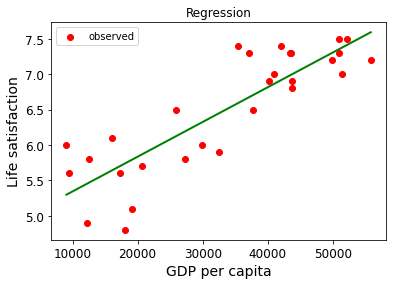

In [15]:
# Plot scatterplot 
plt.scatter(X, y, c='red', label='observed')
plt.legend(loc='best')

plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.title('Regression')

# plot the regression function
plt.plot(X, model.predict(X), c='green', label='fitted', linewidth=2)

plt.show()

### Model Evaluation Example

#### 1. Preparing X and y using pandas
- We already did this process above
- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

See more details about Pandas Series and Numpy

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

#### 2. Splitting X and y into training and testing sets

We are using the same data that is stored X, y above. 

In [16]:
from sklearn.model_selection import train_test_split

# split the data into training and testing (test data size 30%)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size=0.3, random_state=1)


#### 3. Linear regression in scikit-learn

In [17]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate a simple linear regression model 
linreg = LinearRegression()


# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

#### 4. Making predictions for testing data

Use X_test

In [18]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred

array([[6.59031623],
       [6.90629497],
       [6.82350342],
       [6.90057464],
       [7.24870458],
       [6.88774681],
       [5.42891846],
       [6.12434396],
       [7.19687366]])

In [19]:
print(linreg.score(X_train, y_train))

0.71190057557096


In [20]:
print(linreg.score(X_test, y_test))

0.5844350680603294


#### 5. Computing the RMSE 

https://scikit-learn.org/stable/modules/model_evaluation.html

In [21]:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.39596209321120834

#### 6. K Cross Validation and Learning Curve

In [22]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 3 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

KFold(n_splits=3, random_state=None, shuffle=True)


##### Setting up a testbed using KFold 

In [23]:
# Let's create a new simple linear regressor
linreg = LinearRegression()

# Conduct 3-fold cross validation

rmse = []
r2 = []
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    r2.append(metrics.r2_score(y_test, y_pred))


print(rmse)
print(r2)

[0.4337025332412379, 0.4179887789199219, 0.49048337572453204]
[0.6665522294985516, 0.3882541340932517, 0.7159403893464616]


#### Learning Curve

Check the details for learning curve

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

[[0.34361706 0.42237185 0.3058151 ]
 [0.48710329 0.58535826 0.48858587]
 [0.5497845  0.70710576 0.5470051 ]
 [0.58665666 0.68181261 0.6474733 ]
 [0.61419961 0.6624037  0.67345089]]
[[1.60933715 0.66219997 1.29336377]
 [0.98462835 0.67449355 0.45628672]
 [0.75198805 0.68852743 0.88824352]
 [0.72833465 0.69216202 0.66834889]
 [0.79417307 0.67128222 0.58760801]]


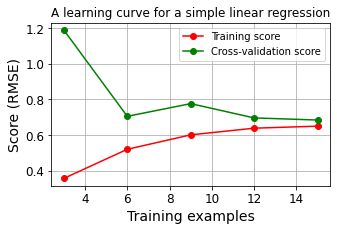

In [24]:
from sklearn.model_selection import learning_curve
    
# evaluate the training and testing and retrieve the information of model performance. 

train_sizes = np.linspace(0.2, 0.8, 5)


train_sizes, train_mse, test_mse = learning_curve(linreg, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=3, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

print(train_scores)
print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a simple linear regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### (2) Multivariate Linear Regression on a Synthetic Dataset

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:
### Form of linear regression

$y = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

- $y$ is the response
- $x_0 = 1$
- $x_1, x_2, ..., x_n$ are attributes
- $\theta_0$ is the coeffficient for $x_0$ (intercept)
- $\theta_1$ is the coefficient for $x_1$ (the first attribute)
- $\theta_n$ is the coefficient for $x_n$ (the nth attribute)

The $\theta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

#### Generate a synthetic data
- Each data tuple has 4 attributes in X and its corresponding y value. 

- For generating a random dataset of n=1000 samples for regression modeling, see the detail:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

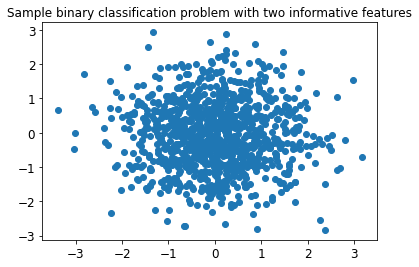

In [25]:
# synthetic dataset for classification (binary)
from sklearn.datasets import make_regression, make_blobs

plt.figure()
plt.title('Sample binary classification problem with two informative features')

# generate X values and y values
# check make_regression() for other parameters
X, y = make_regression(n_samples = 1000, n_features=5,
                                n_informative=2,n_targets=1,
                                noise=0.0, random_state=0)

# Warning!!! scatter() function can handle only 2 dimensions
# Hence you pick two attributes only and plot the data
plt.scatter(X[:, 0], X[:, 3])
plt.show()

#### Split the data into training and test data

In [26]:
from sklearn.model_selection import train_test_split

# split the data into training and testing (test data size 30%)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size=0.3, random_state=1)

#### Build a inear regression model

In [27]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate a simple linear regression model 
linreg = LinearRegression()


# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

#### Prediction

In [28]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred

array([-8.14571146e+01, -1.35144652e+02, -8.36661599e+01,  1.04061111e+02,
        8.08212553e+01,  1.12001966e+02, -9.52264283e+01, -6.71360609e+01,
       -3.10738668e+01,  7.17730923e+01, -6.04865862e+01, -1.61411034e+02,
       -3.48197850e+01, -2.61664993e+01, -1.10917919e+02, -3.69792740e+01,
        5.72945882e+01,  6.08954729e+01,  1.90400352e+01, -9.20592621e+01,
        3.26527660e+01,  5.84659596e+01, -3.37699902e+01, -1.09540887e+01,
       -8.53749279e+01,  6.47397472e+01,  1.41425800e+02,  5.06241812e+01,
        5.54051450e+00,  2.55206676e+01,  5.19136063e+00, -7.34221922e+01,
        6.94669141e+01, -1.43148064e+01, -3.05407500e+01,  1.31091422e+01,
       -1.02154641e+02, -5.41160364e+01, -5.85203338e+01, -1.85263783e+01,
       -1.05525139e+02, -5.86956961e+01,  5.51164958e+01,  3.02243404e+01,
        5.73808239e+01, -9.78340785e+00, -1.79893145e+00,  1.36509701e+02,
       -6.27068524e+01, -5.19580973e+01, -1.22732433e-01,  2.24983673e+01,
        7.24229493e+01,  

#### Check RMSE of the model

In [29]:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

4.425234823553896e-14

#### K-cross validation

In [30]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 3 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

# Let's create a new simple linear regressor
linreg = LinearRegression()

# Conduct 3-fold cross validation

rmse = []
r2 = []
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    r2.append(metrics.r2_score(y_test, y_pred))

print(rmse, '\n Average RMSE:', np.mean(rmse))
print(r2, '\n Average R2:', np.mean(r2))

KFold(n_splits=3, random_state=None, shuffle=True)
[2.964240276566871e-13, 6.892276348728777e-14, 3.6751820711467777e-14] 
 Average RMSE: 1.340328706184809e-13
[1.0, 1.0, 1.0] 
 Average R2: 1.0


#### Learning curve

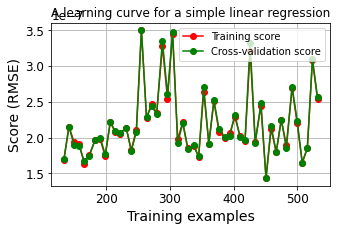

In [31]:
from sklearn.model_selection import learning_curve
    
# evaluate the training and testing and retrieve the information of model performance. 

train_sizes = np.linspace(0.2, 0.8, 50)

train_sizes, train_mse, test_mse = learning_curve(linreg, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=3, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a simple linear regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

###  Part 1: Explore insight of the data using simple regression

The following Git repository is for the COVID-19 visual dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering:
https://github.com/CSSEGISandData/COVID-19

Read the information on the dashboard and check the datasets details

Datasets are located in a folder: csse_covid_19_data

### Tasks

1. Select day for X and # of cases for y from either US only or all data.

   1.1 (optional) If you find any missing data or/and invalid data in the selected attributes you would like to work on, apply tools to handle these data. 

2. Conduct preliminary exploratory data analysis on the selected data and visualize the data. This may include the following but not limited:

    - The five number summary, box plots, histograms, or/and scatter plots. 

3. Display simple linear regression function with a scatter plot
    --> You will see the data does not follow a simple linear function. 
   
4. Create a logistic regression function instead of a simple linear regression. See the web resources below:

    from sklearn.linear_model import LogisticRegression
    
    - This time draw a scatter plot of the data together with the logistic regression function. 

#### (1) Load data

- Examples in the next three cells show how to obtain data from web resources and load the data to DataFrame.

- You should modify the code for the datasets and data attributes you are interested. 

##### Obtain data from the Web

In [32]:
import os
datapath = os.path.join("csse_covid_19_data", "csse_covid_19_data", "")

import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
os.makedirs(datapath, exist_ok=True)
for filename in ("time_series_covid19_confirmed_US.csv",):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "csse_covid_19_data/csse_covid_19_data/" + filename
    urllib.request.urlretrieve(DOWNLOAD_ROOT, datapath + filename)

In [33]:
us_confirmed_timeseries = pd.read_csv(datapath + "time_series_covid19_confirmed_US.csv")

wash_cases = us_confirmed_timeseries.loc[us_confirmed_timeseries["Province_State"] == "Washington"]

wash_cases = wash_cases.drop(columns=['UID', 'iso2', 'iso3', 'FIPS', 'Province_State', 'Country_Region', 'Lat', 'Long_'
, 'code3', 'Combined_Key', 'Admin2'])

cases_by_date = wash_cases.sum()

##### Load data to DataFrame

In [34]:
df = pd.DataFrame({'date':cases_by_date.index, 'cases':cases_by_date.values})
df['day_number'] = df.index

print(X.shape)
print(y.shape)

(1000, 5)
(1000,)


In [35]:
df.head()

,date,cases,day_number
0,1/22/20,1,0
1,1/23/20,1,1
2,1/24/20,1,2
3,1/25/20,1,3
4,1/26/20,1,4


In [36]:
X = np.c_[df['day_number']]
y = np.c_[df['cases']]

In [37]:
print(X.shape)
print(y.shape)

(829, 1)
(829, 1)


In [38]:
print(df.isna().sum())

date          0
cases         0
day_number    0
dtype: int64


In [39]:
print(df['date'].duplicated().sum())

0


In [40]:
df.drop('date',axis=1, inplace=True)

In [41]:
print(df)

       cases  day_number
0          1           0
1          1           1
2          1           2
3          1           3
4          1           4
..       ...         ...
824  1483332         824
825  1489316         825
826  1493194         826
827  1493194         827
828  1498116         828

[829 rows x 2 columns]


#### (2) EDA

In [42]:
df.describe()

,cases,day_number
count,8.290000e+02,829.000000
mean,4.413017e+05,414.000000
std,4.437221e+05,239.455981
min,1.000000e+00,0.000000
25%,6.785400e+04,207.000000
50%,3.478840e+05,414.000000
75%,6.678340e+05,621.000000
max,1.498116e+06,828.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x28a4d4ad340>,
 'caps': [<matplotlib.lines.Line2D at 0x28a4dbec400>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a4d4adeb0>],
 'medians': [<matplotlib.lines.Line2D at 0x28a4dbec040>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a4dbecaf0>],
 'means': []}

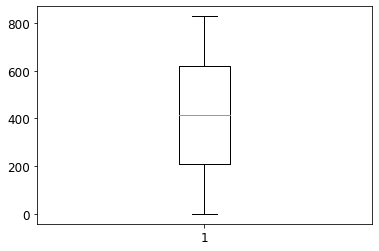

In [43]:
plt.boxplot(X)

{'whiskers': [<matplotlib.lines.Line2D at 0x28a4dfca5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x28a4dfcac70>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a4dfca250>],
 'medians': [<matplotlib.lines.Line2D at 0x28a4dfd6370>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a4dfd66d0>],
 'means': []}

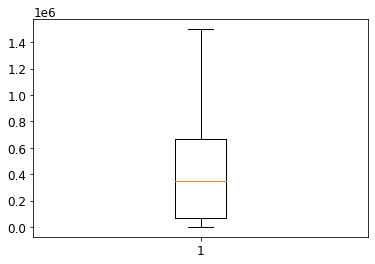

In [44]:
plt.boxplot(y)

(array([34., 33., 33., 33., 33., 33., 33., 33., 34., 33., 33., 33., 33.,
        33., 33., 33., 34., 33., 33., 33., 33., 33., 33., 33., 34.]),
 array([  0.  ,  33.12,  66.24,  99.36, 132.48, 165.6 , 198.72, 231.84,
        264.96, 298.08, 331.2 , 364.32, 397.44, 430.56, 463.68, 496.8 ,
        529.92, 563.04, 596.16, 629.28, 662.4 , 695.52, 728.64, 761.76,
        794.88, 828.  ]),
 <BarContainer object of 25 artists>)

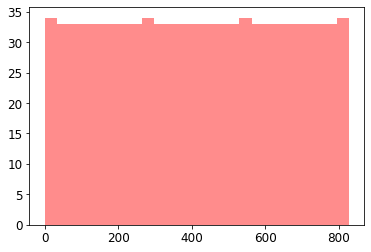

In [45]:
plt.hist(X,bins=25, alpha=0.45, color='red')

(array([195.,  95.,  27.,  25.,  25.,  62.,  49.,  81.,  21.,  20.,  18.,
         26.,  37.,  26.,   7.,   5.,   3.,   5.,   3.,   3.,   4.,   3.,
          7.,  35.,  47.]),
 array([1.0000000e+00, 5.9925600e+04, 1.1985020e+05, 1.7977480e+05,
        2.3969940e+05, 2.9962400e+05, 3.5954860e+05, 4.1947320e+05,
        4.7939780e+05, 5.3932240e+05, 5.9924700e+05, 6.5917160e+05,
        7.1909620e+05, 7.7902080e+05, 8.3894540e+05, 8.9887000e+05,
        9.5879460e+05, 1.0187192e+06, 1.0786438e+06, 1.1385684e+06,
        1.1984930e+06, 1.2584176e+06, 1.3183422e+06, 1.3782668e+06,
        1.4381914e+06, 1.4981160e+06]),
 <BarContainer object of 25 artists>)

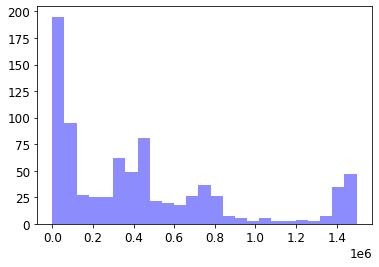

In [46]:
plt.hist(y,bins=25, alpha=0.45, color='blue')

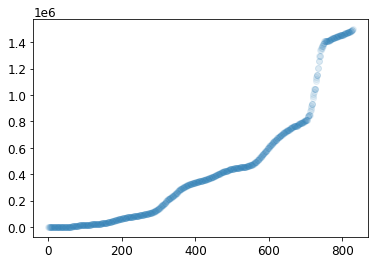

In [47]:
plt.scatter(X,y, alpha = 0.08, norm=True)

From day 0 to day 700, the number of cases is increasing steadily then increase rapidly from day 700 to day 800. The number of cases from day 700 to day 800 is high but not continuous. This might means that from day 0 to day 700, we have steady increasing cases every day but from day 700 and above, the cases might increase radpidly but not in consecutive days.

#### (3) A linear regression model

- Train a linear regression model
- Visualize the model with scatter plot
- Conduct k=10 cross validation and show the result
- Display learning curve based on training data

In [48]:
#model
model = LinearRegression()

model.fit(X,y)

LinearRegression()

In [49]:
print(model.coef_)
print(model.intercept_)

[[1710.96865313]]
[-267039.36015231]


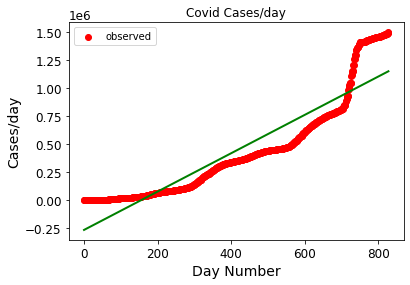

In [50]:
# Plot scatterplot 
plt.scatter(X, y, c='red', label='observed')
plt.legend(loc='best')

plt.xlabel('Day Number')
plt.ylabel('Cases/day')
plt.title('Covid Cases/day')

# plot the regression function
plt.plot(X, model.predict(X), c='green', label='fitted', linewidth=2)

plt.show()



In [60]:
# split the data into training and testing (test data size 30%)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size=0.3, random_state=1)



In [61]:
# instantiate a simple linear regression model 
linreg = LinearRegression()

In [62]:
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred

print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))


0.8526582405044634
0.852075728294015


In [65]:
k_cv = KFold(n_splits=10, random_state=None, shuffle=True)
k_cv.get_n_splits(X)

lin_rmse = []
lin_r2 = []

for train_index, test_index in k_cv.split(X):
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]
    
    linreg.fit(X_train,y_train)
    y_pred_log = linreg.predict(X_test)
    
    lin_rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred_log)))
    lin_r2.append(metrics.r2_score(y_test,y_pred_log))


[[387.80576229 423.49277337 409.31484998 417.33456793 425.1997969
  405.92995322 413.53845772 399.62701083 421.35473185 294.41949804]
 [403.11098261 422.87403705 416.3050568  422.23551675 422.24027234
  410.65808435 414.4706533  407.10467057 408.61327066 297.60211955]
 [398.24844407 418.19412817 418.12174982 419.44914874 422.19150443
  414.70090462 412.32555133 410.71592228 403.68108946 315.56789985]
 [401.79170467 418.5404597  424.15201004 421.30854949 420.07960851
  413.00605087 409.17150448 411.92891066 410.26635683 313.53032796]
 [396.25948436 416.07572847 423.41377767 420.53608627 422.83415255
  415.26336389 408.5849587  414.54883666 409.8837679  309.52912903]]
[[544.10253348 364.80377593 203.21484388 304.05699093 284.65932212
  350.09107411 463.84302879 359.52363845 403.87921634 751.94904322]
 [538.63419547 349.24676959 214.20037207 325.26292285 291.96798969
  368.0793266  477.57250872 381.27089749 405.12566127 745.26156963]
 [536.59845814 344.20605485 213.18755982 316.58126995 2

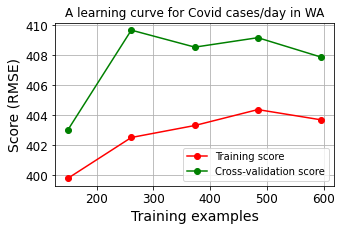

In [70]:
#Display learning curve
# evaluate the training and testing and retrieve the information of model performance. 

train_sizes = np.linspace(0.2, 0.8, 5)


train_sizes, train_mse, test_mse = learning_curve(linreg, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

print(train_scores)
print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for Covid cases/day in WA')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [71]:
print(lin_rmse,'\n Average RMSE:',np.mean(lin_rmse))
print(lin_r2,'\n Average R2:',np.mean(lin_r2))

[172410.04819780955, 169369.8514544181, 157103.54097893616, 151918.19942768913, 174461.7162048912, 154346.2815993493, 171358.66004985187, 162608.15817049937, 186745.7953524528, 204847.39767410475] 
 Average RMSE: 170516.96491100025
[0.843281626673708, 0.844964552450719, 0.8266208167573205, 0.8596921695283168, 0.838518687663437, 0.8775991301257566, 0.8598550345493068, 0.8569420490578544, 0.8445706600559157, 0.8383981760799684] 
 Average R2: 0.8490442902942303


#### (4) A logistic regression model

- Train a logistic regression model
- Visualize the model with scatter plot
- Conduct k=10 cross validation and show the result
- Display learning curve based on training data size

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(max_iter = 2000)
logreg.fit(X_train,y_train.ravel())
y_pred = logreg.predict(X_test)

C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


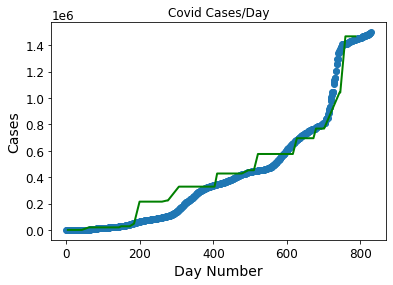

In [76]:
plt.scatter(X_train,y_train)
plt.xlabel("Day Number")
plt.ylabel("Cases")
plt.title("Covid Cases/Day")

plt.plot(X_test,y_pred,c='g',label='fitted',linewidth=2)
plt.show()

In [77]:
k_cv = KFold(n_splits=10, random_state=None, shuffle=True)
k_cv.get_n_splits(X)

logReg = LogisticRegression(max_iter=2000)

log_rmse = []
log_r2 = []

for train_index, test_index in k_cv.split(X):
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]
    
    logReg.fit(X_train,y_train)
    y_pred_log = logReg.predict(X_test)
    
    log_rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred_log)))
    log_r2.append(metrics.r2_score(y_test,y_pred_log))


C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [78]:
print(log_rmse,'\n Average RMSE:',np.mean(log_rmse))
print(log_r2,'\n Average R2:',np.mean(log_r2))

[105377.39511388555, 85237.35771835744, 101907.40914768058, 164098.3173168723, 157509.82692839214, 99380.6773627768, 69167.67415778551, 91264.86692846201, 131049.19959179683, 123505.77063648563] 
 Average RMSE: 112849.84949024949
[0.9143461618154751, 0.9717702854238326, 0.9567448402749813, 0.8583387751965987, 0.8557929255961045, 0.9421309571571618, 0.9802091718966357, 0.9478310140545426, 0.9150581755322772, 0.9087344763748632] 
 Average R2: 0.9250956783322474


C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the dat

[[423.11525708 368.34781215 267.48799816 342.70898553 296.05379181
  350.9636267  298.4895656  377.77647866 262.31036831 306.9266588 ]
 [433.64342704 391.37878896 314.36288873 393.67993661 286.60759208
  283.79954092 313.48287797 324.7114407  367.32112605 308.89021977]
 [343.89936989 371.80854538 526.81947161 323.54663919 265.32582578
  388.66189684 293.84950553 338.6239732  277.99580992 258.32014663]
 [253.87753094 341.43213264 307.27176854 230.64722874 237.32962014
  332.06341994 296.02947735 288.24522236 430.50820671 308.11043563]
 [405.1483513  361.09194044 288.27558368 237.10692233 302.1610593
  374.40593942 325.45435958 275.09575041 381.95920001 296.5627632 ]]
[[388.42627862 356.26799883 289.64073549 357.49304986 300.7519534
  369.67222173 306.63346595 373.61634725 263.38878254 311.35275651]
 [420.3558591  392.78171905 334.95821869 402.39023975 300.95852913
  302.58105227 317.80715037 344.84866279 375.91553659 304.8718669 ]
 [351.23490513 366.63681277 525.52612766 320.92011278 26

C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


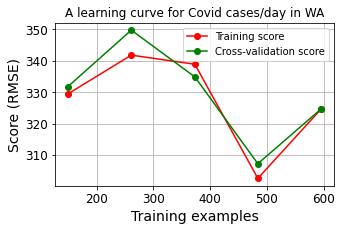

In [79]:
#Display learning curve
# evaluate the training and testing and retrieve the information of model performance. 

train_sizes = np.linspace(0.2, 0.8, 5)


train_sizes, train_mse, test_mse = learning_curve(logReg, X, y.ravel(), 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

print(train_scores)
print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for Covid cases/day in WA')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### Part 2: Write a summary of what you find from the data

- Submit your summary to Canvas
- Provide a link to your Git repo of the assignment. 

Logistic regression is better than linear regression but still it results in a low score. 

The data shown above tracks the number of COVID-19 Cases in Washington State. The data shows little change until day 40 where the cases start to increase exponentially. Due to this, a linear model is insufficiant. Furthermore, a logistic model works much better. It should be noted that the number of cases is changing due to external factors such as social distancing and really cannot be modeled based on either of these models long term.

Note to reader: These Cross Validation Scores were calculated on 4/20/2022. Since the csv file is updated frequently as new data comes in and the data in this notebook changes as a result, I do not expect the scores to remain the same. If we have a true flattening of the curve the linear model will perform better in the new part and the logistic model will perform worse.

Using the linear regression model, I see on the learning curve, the RMSE score on testing set is higher than the RMSE on the training set so the model is overfitted. The average r2 score on the logistic model is higher than the linear model and show lower average RMSE score than the linear model. From examining the learning curve achieved from running the logistic regression model, I see that this model is fitted since the RMSE score on the training dataset is very close to the RMSE on the testing set. I believe that the logistic model performs better than the linear model after performing comparison the two model on the same data set.

